In [1]:
from rec_model import microgrid
import os

In [2]:
CONFIG_PATH = os.path.join("..", "config", "sample_setup.yaml")

In [3]:
microgrid.setup(config=CONFIG_PATH)

In [4]:
microgrid.get_components()

[{'id': 'load_0', 'type': 'LoadModule'},
 {'id': 'renewable_0', 'type': 'RenewableModule'},
 {'id': 'balancing_0', 'type': 'UnbalancedEnergyModule'},
 {'id': 'grid_0', 'type': 'GridModule'},
 {'id': 'battery_0', 'type': 'BatteryModule'}]

In [5]:
microgrid.get_actions()

{'grid': [None], 'battery': [None]}

In [6]:
microgrid.reset()

In [7]:
microgrid.get_status()

{'load': [{'load_current': -1.2}],
 'renewable': [{'renewable_current': 0.8}],
 'balancing': [{}],
 'grid': [{'import_price_current': 0.21,
   'export_price_current': 0.11,
   'co2_per_kwh_current': 0.5,
   'grid_status_current': 1.0}],
 'battery': [{'soc': 0.5, 'current_charge': 25.0}]}

In [15]:
control = {
    "battery" : [0.0],
    "grid": [0.0]
}
result = microgrid.run(control)

In [21]:
microgrid.microgrid.log

module_name     load                       renewable              \
module_number      0                               0               
field         reward load_met load_current    reward curtailment   
0                0.0      1.2         -1.2       0.0         0.0   

module_name                                    balancing            \
module_number                                          0             
field         renewable_used renewable_current    reward loss_load   
0                        0.8               0.8      -4.0       0.4   

module_name                   ...       battery                     balance  \
module_number                 ...             0                           0   
field         overgeneration  ... charge_amount  soc current_charge  reward   
0                        0.0  ...           0.0  0.5           25.0    -4.0   

module_name                                                                  \
module_number                                                                 
field         overall_provided_to_microgrid overall_absorbed_from_microgrid   
0                                       1.2                             1.2   

module_name                                       \
module_number                                      
field         controllable_provided_to_microgrid   
0                                            0.0   

module_name                                         \
module_number                                        
field         controllable_absorbed_from_microgrid   
0                                              0.0   

module_name                                                              
module_number                                                            
field         fixed_provided_to_microgrid fixed_absorbed_from_microgrid  
0                                     0.0                           1.2  

[1 rows x 30 columns]

In [19]:
result

{'observation': {'load': [0.24999999999999994],
  'grid': [array([0.10526316, 0.10526316, 0.        , 0.        ])],
  'battery': [array([0.5, 0.5])],
  'renewable': [0.8749999999999999],
  'balancing': [array([], dtype=float64)]},
 'reward': -3.999999999999999,
 'done': False,
 'info': {'load': [('absorbed_energy', 1.2)],
  'grid': [('provided_energy', 0.0), ('co2_production', 0.0)],
  'battery': [('provided_energy', 0.0)],
  'renewable': [('provided_energy', 0.8), ('curtailment', 0.0)],
  'balancing': [('provided_energy', 0.3999999999999999)]}}

In [17]:
microgrid.get_status()

{'load': [{'load_current': -0.9}],
 'renewable': [{'renewable_current': 0.7}],
 'balancing': [{}],
 'grid': [{'import_price_current': 0.22,
   'export_price_current': 0.12,
   'co2_per_kwh_current': 0.5,
   'grid_status_current': 1.0}],
 'battery': [{'soc': 0.5, 'current_charge': 25.0}]}

In [23]:
control = {
    "battery" : [0.0],
    "grid": [0.3]
}
result = microgrid.run(control)

In [25]:
result

{'observation': {'load': [0.08333333333333323],
  'grid': [array([0.15789474, 0.15789474, 0.        , 0.        ])],
  'battery': [array([0.5, 0.5])],
  'renewable': [0.5],
  'balancing': [array([], dtype=float64)]},
 'reward': -0.066,
 'done': False,
 'info': {'load': [('absorbed_energy', 0.9)],
  'grid': [('provided_energy', 0.3), ('co2_production', 0.15)],
  'battery': [('provided_energy', 0.0)],
  'renewable': [('provided_energy', 0.6000000000000001),
   ('curtailment', 0.09999999999999987)],
  'balancing': [('provided_energy', 0.0)]}}

In [27]:
microgrid.get_status()

{'load': [{'load_current': -1.1}],
 'renewable': [{'renewable_current': 0.4}],
 'balancing': [{}],
 'grid': [{'import_price_current': 0.23,
   'export_price_current': 0.13,
   'co2_per_kwh_current': 0.5,
   'grid_status_current': 1.0}],
 'battery': [{'soc': 0.5, 'current_charge': 25.0}]}

In [29]:
control = {
    "battery" : [0.7],
    "grid": [0.0]
}
result = microgrid.run(control)
result

{'observation': {'load': [0.16666666666666663],
  'grid': [array([0.21052632, 0.21052632, 0.        , 0.        ])],
  'battery': [array([0.48526316, 0.48526316])],
  'renewable': [0.625],
  'balancing': [array([], dtype=float64)]},
 'reward': -1.1102230246251565e-15,
 'done': False,
 'info': {'load': [('absorbed_energy', 1.1)],
  'grid': [('provided_energy', 0.0), ('co2_production', 0.0)],
  'battery': [('provided_energy', 0.7)],
  'renewable': [('provided_energy', 0.4), ('curtailment', 0.0)],
  'balancing': [('provided_energy', 1.1102230246251565e-16)]}}

In [31]:
microgrid.get_status()

{'load': [{'load_current': -1.0}],
 'renewable': [{'renewable_current': 0.5}],
 'balancing': [{}],
 'grid': [{'import_price_current': 0.24,
   'export_price_current': 0.14,
   'co2_per_kwh_current': 0.5,
   'grid_status_current': 1.0}],
 'battery': [{'soc': 0.48526315789473684,
   'current_charge': 24.263157894736842}]}

In [39]:
microgrid.get_log()

module_name     load                       renewable              \
module_number      0                               0               
field         reward load_met load_current    reward curtailment   
0                0.0      1.2         -1.2       0.0         0.0   
1                0.0      0.9         -0.9       0.0         0.1   
2                0.0      1.1         -1.1       0.0         0.0   

module_name                                        balancing                \
module_number                                              0                 
field         renewable_used renewable_current        reward     loss_load   
0                        0.8               0.8 -4.000000e+00  4.000000e-01   
1                        0.6               0.7 -0.000000e+00  0.000000e+00   
2                        0.4               0.4 -1.110223e-15  1.110223e-16   

module_name                   ...       battery                      \
module_number                 ...             0                       
field         overgeneration  ... charge_amount  soc current_charge   
0                        0.0  ...           0.0  0.5           25.0   
1                        0.0  ...           0.0  0.5           25.0   
2                        0.0  ...           0.0  0.5           25.0   

module_name         balance                                \
module_number             0                                 
field                reward overall_provided_to_microgrid   
0             -4.000000e+00                           1.2   
1             -6.600000e-02                           0.9   
2             -1.110223e-15                           1.1   

module_name                                    \
module_number                                   
field         overall_absorbed_from_microgrid   
0                                         1.2   
1                                         0.9   
2                                         1.1   

module_name                                       \
module_number                                      
field         controllable_provided_to_microgrid   
0                                            0.0   
1                                            0.3   
2                                            0.7   

module_name                                         \
module_number                                        
field         controllable_absorbed_from_microgrid   
0                                              0.0   
1                                              0.0   
2                                              0.0   

module_name                                                              
module_number                                                            
field         fixed_provided_to_microgrid fixed_absorbed_from_microgrid  
0                                     0.0                           1.2  
1                                     0.0                           0.9  
2                                     0.0                           1.1  

[3 rows x 30 columns]

In [41]:
microgrid.microgrid.get_forecast_horizon()

0

<Axes: >

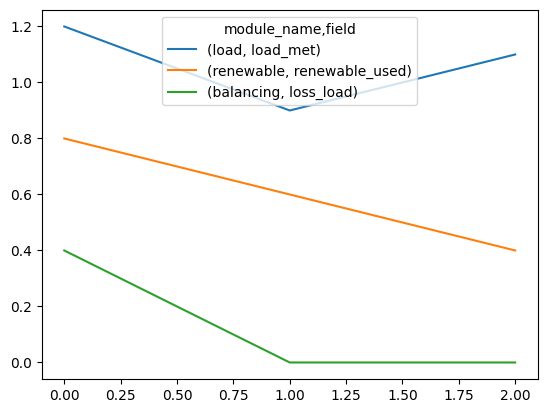

In [37]:
microgrid.microgrid.log[[('load', 0, 'load_met'),
               ('renewable', 0, 'renewable_used'),
               ('balancing', 0, 'loss_load')]].droplevel(axis=1, level=1).plot()

In [45]:
PATH = 'microgrid_dump.yaml'
with open(PATH, 'wb') as f:
    microgrid.microgrid.dump(f)

TypeError: a bytes-like object is required, not 'str'